# MODEL 
- 1) Retained, Week, MON 구분 모델
- 2) MON 중 1mon과 2mon 구분 모델
---

In [1]:
# module 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
plt.rcParams["figure.figsize"] = (14,8)

In [3]:
def plot_feature_importances(model, feature):
#     print(feature)
    n_features = len(feature)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature)
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

In [11]:
# dataset 로딩
x_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity_week.csv').sort_values(by='acc_id', ascending=True)
y_load = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)['label']

In [12]:
x_data = x_load
y_data = y_load

In [13]:
x_data = x_data.drop(['Unnamed: 0','acc_id', 'label'], axis=1)

In [14]:
x_data

,party_cnt_1,party_cnt_2,party_cnt_3,party_cnt_4,party_cnt_5,party_cnt_6,party_cnt_7,party_cnt_8,party_time,party_cnt,...,cnt_clear_bam_8,normal_chat_8,whisper_chat_8,district_chat_8,party_chat_8,guild_chat_8,faction_chat_8,cnt_use_buffitem_8,gathering_cnt_8,making_cnt_8
0,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,-0.302018,-0.384689,2.697146,-0.135874,2.010619,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.499441,-0.027758,-0.365536
1,-0.282484,-0.298979,-0.279143,-0.285470,2.319122,-0.200566,0.010625,0.028127,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
2,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,-0.302018,-0.384689,1.807473,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
3,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,-0.302018,-0.384689,-0.482341,-0.449449,-0.393069,...,-0.03313,-0.034038,-0.145568,-0.016574,-0.275174,-0.343293,-0.024028,-0.438689,-0.027758,-0.365536
4,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,0.022626,-0.279272,-0.001042,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
5,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,-0.302018,-0.384689,2.040830,-0.303902,-0.336363,...,-0.03313,-0.034038,-0.182536,-0.016574,-0.275174,-0.343293,-0.024028,-0.487441,-0.027758,-0.365536
6,-0.064583,0.039425,-0.134559,-0.018065,-0.145305,-0.159986,-0.358334,-0.424002,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
7,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,-0.302018,-0.384689,2.565882,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
8,0.126081,-0.142793,-0.062267,-0.084917,-0.243882,-0.200566,-0.384689,-0.467756,-0.470692,-0.437173,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
9,-0.282484,-0.298979,-0.279143,-0.285470,-0.303029,1.828459,3.054542,0.728198,2.764299,2.146083,...,-0.03313,-0.034038,0.187146,-0.016574,-0.249250,-0.343293,-0.024028,1.359742,-0.027758,-0.365536


In [7]:
x_temp = x_data
y_temp = y_data

In [8]:
x_data, x_test, y_data, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

In [9]:
x_data.shape

(90000, 299)

### layer 1 - data set
---

In [10]:
y_data_layer1 = y_data.map(lambda value: "MON" if value == "month" or value == "2month" else value)

In [11]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_data, y_data_layer1, test_size=0.1, random_state=1)

### layer 2 - data set
---

In [12]:
custom_filter = [v[0] or v[1] for v in zip(list((y_data == 'month').values), list((y_data == '2month').values))]
x_data_layer2 = x_data[custom_filter]
y_data_layer2 = y_data[custom_filter]

In [13]:
# x_data_layer2['new1'] = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\new.csv').new1.values
# x_data_layer2['new2'] = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\new.csv').new2.values
# x_data_layer2['new3'] = x_data_layer2['new1'] > x_data_layer2['new2'].values

In [14]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

### Our Model
---

### model 1

In [15]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_data, y_data_layer1, test_size=0.1, random_state=1)

In [1]:
#hyper parameter
column_filter = ['party_cnt', 'gd_cnt', 'party_time', 'party_cnt_1', 'party_cnt_2', 'party_cnt_3', 'party_cnt_4', 'party_cnt_5', 'party_cnt_6', 'party_cnt_7', 'party_cnt_8']

In [20]:
# for i in range(1,8):
#     temp_a = 'cnt_dt_' + str(i) + '_to_8'
#     temp_b = 'cnt_dt_' + str(i)
#     temp_c = 'cnt_dt_8'
#     x_train_layer1[temp_a] = ((x_train_layer1[temp_c] - x_train_layer1[temp_c].min()) / (x_train_layer1[temp_c].max() - x_train_layer1[temp_c].min()))/((x_train_layer1[temp_b] - x_train_layer1[temp_b].min()) / (x_train_layer1[temp_b].max() - x_train_layer1[temp_b].min())   + 0.01)

In [21]:
# for i in range(1,8):
#     temp_a = 'cnt_dt_' + str(i) + '_to_8'
#     temp_b = 'cnt_dt_' + str(i)
#     temp_c = 'cnt_dt_8'
#     x_test_layer1[temp_a] = ((x_test_layer1[temp_c] - x_test_layer1[temp_c].min()) / (x_test_layer1[temp_c].max() - x_test_layer1[temp_c].min()))/((x_test_layer1[temp_b] - x_test_layer1[temp_b].min()) / (x_test_layer1[temp_b].max() - x_test_layer1[temp_b].min())   + 0.01)

In [260]:
for i in range(1,8):
    temp_a = 'play_time_' + str(i) + '_to_8'
    temp_b = 'play_time_' + str(i)
    temp_c = 'play_time_8'
    x_train_layer1[temp_a] = ((x_train_layer1[temp_c] - x_train_layer1[temp_c].min()) / (x_train_layer1[temp_c].max() - x_train_layer1[temp_c].min()))/((x_train_layer1[temp_b] - x_train_layer1[temp_b].min()) / (x_train_layer1[temp_b].max() - x_train_layer1[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [261]:
for i in range(1,8):
    temp_a = 'play_time_' + str(i) + '_to_8'
    temp_b = 'play_time_' + str(i)
    temp_c = 'play_time_8'
    x_test_layer1[temp_a] = ((x_test_layer1[temp_c] - x_test_layer1[temp_c].min()) / (x_test_layer1[temp_c].max() - x_test_layer1[temp_c].min()))/((x_test_layer1[temp_b] - x_test_layer1[temp_b].min()) / (x_test_layer1[temp_b].max() - x_test_layer1[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
# for i in range(1,8):
#     temp_a = 'party_cnt_' + str(i) + '_to_8'
#     temp_b = 'party_cnt_' + str(i)
#     temp_c = 'party_cnt_8'
#     x_train_layer1[temp_a] = ((x_train_layer1[temp_c] - x_train_layer1[temp_c].min()) / (x_train_layer1[temp_c].max() - x_train_layer1[temp_c].min()))/((x_train_layer1[temp_b] - x_train_layer1[temp_b].min()) / (x_train_layer1[temp_b].max() - x_train_layer1[temp_b].min())   + 0.01)

In [23]:
# for i in range(1,8):
#     temp_a = 'party_cnt_' + str(i) + '_to_8'
#     temp_b = 'party_cnt_' + str(i)
#     temp_c = 'party_cnt_8'
#     x_test_layer1[temp_a] = ((x_test_layer1[temp_c] - x_test_layer1[temp_c].min()) / (x_test_layer1[temp_c].max() - x_test_layer1[temp_c].min()))/((x_test_layer1[temp_b] - x_test_layer1[temp_b].min()) / (x_test_layer1[temp_b].max() - x_test_layer1[temp_b].min())   + 0.01)

In [264]:
for i in range(1,8):
    temp_a = 'game_combat_time_' + str(i) + '_to_8'
    temp_b = 'game_combat_time_' + str(i)
    temp_c = 'game_combat_time_8'
    x_train_layer1[temp_a] = ((x_train_layer1[temp_c] - x_train_layer1[temp_c].min()) / (x_train_layer1[temp_c].max() - x_train_layer1[temp_c].min()))/((x_train_layer1[temp_b] - x_train_layer1[temp_b].min()) / (x_train_layer1[temp_b].max() - x_train_layer1[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [265]:
for i in range(1,8):
    temp_a = 'game_combat_time_' + str(i) + '_to_8'
    temp_b = 'game_combat_time_' + str(i)
    temp_c = 'game_combat_time_8'
    x_test_layer1[temp_a] = ((x_test_layer1[temp_c] - x_test_layer1[temp_c].min()) / (x_test_layer1[temp_c].max() - x_test_layer1[temp_c].min()))/((x_test_layer1[temp_b] - x_test_layer1[temp_b].min()) / (x_test_layer1[temp_b].max() - x_test_layer1[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, max_depth=20, class_weight={'MON':1.0, 'retained':1.3, 'week':1})

In [25]:
forest1.fit(x_train_layer1.drop(column_filter, axis=1), y_train_layer1)

RandomForestClassifier(bootstrap=True,
            class_weight={'MON': 1.0, 'retained': 1.3, 'week': 1},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [26]:
print("테스트 세트 정확도: {:.3f}".format(forest1.score(x_test_layer1.drop(column_filter, axis=1), y_test_layer1)))

테스트 세트 정확도: 0.849


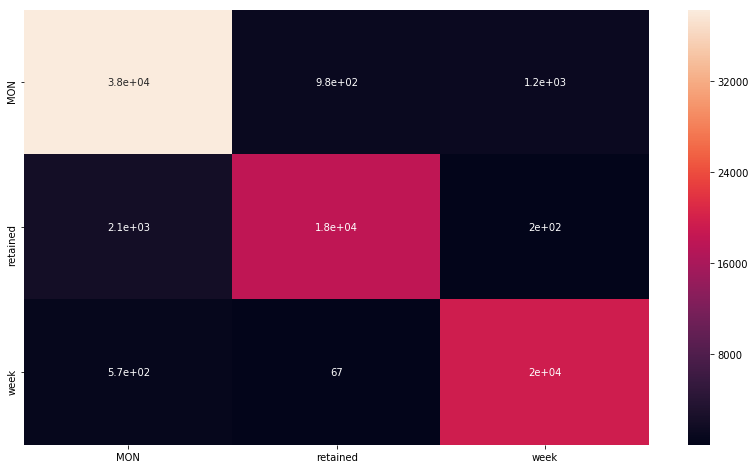

In [27]:
cm = pd.DataFrame(confusion_matrix(y_train_layer1, forest1.predict(x_train_layer1.drop(column_filter, axis=1))), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [28]:
print(classification_report(y_test_layer1, forest1.predict(x_test_layer1.drop(column_filter, axis=1))))

             precision    recall  f1-score   support

        MON       0.87      0.86      0.86      4558
   retained       0.79      0.80      0.79      2194
       week       0.86      0.88      0.87      2248

avg / total       0.85      0.85      0.85      9000



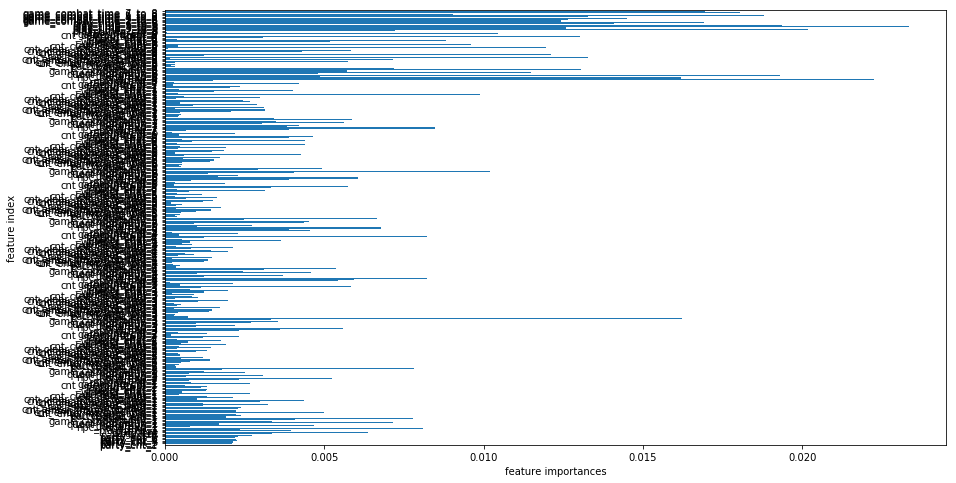

In [271]:
plot_feature_importances(forest1, x_test_layer1.drop(column_filter, axis=1).columns)

### model 2

In [130]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

In [131]:
x_train_layer2['play_time_8_square'] = x_train_layer2['play_time_8'] ** 2
x_train_layer2['play_time_8_cube'] = x_train_layer2['play_time_8'] ** 3
for i in range(1,8):
    temp_a = 'play_time_' + str(i) + '_to_8'
    temp_b = 'play_time_' + str(i)
    x_train_layer2[temp_a] = ((x_train_layer2['play_time_8'] - x_train_layer2['play_time_8'].min()) / (x_train_layer2['play_time_8'].max() - x_train_layer2['play_time_8'].min()))/((x_train_layer2[temp_b] - x_train_layer2[temp_b].min()) / (x_train_layer2[temp_b].max() - x_train_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [85]:
for i in range(1,8):
    temp_a = 'game_combat_time_' + str(i) + '_to_8'
    temp_b = 'game_combat_time_' + str(i)
    temp_c = 'game_combat_time_8'
    x_train_layer2[temp_a] = ((x_train_layer2[temp_c] - x_train_layer2[temp_c].min()) / (x_train_layer2[temp_c].max() - x_train_layer2[temp_c].min()))/((x_train_layer2[temp_b] - x_train_layer2[temp_b].min()) / (x_train_layer2[temp_b].max() - x_train_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [86]:
for i in range(1,8):
    temp_a = 'game_combat_time_' + str(i) + '_to_8'
    temp_b = 'game_combat_time_' + str(i)
    temp_c = 'game_combat_time_8'
    x_test_layer2[temp_a] = ((x_test_layer2[temp_c] - x_test_layer2[temp_c].min()) / (x_test_layer2[temp_c].max() - x_test_layer2[temp_c].min()))/((x_test_layer2[temp_b] - x_test_layer2[temp_b].min()) / (x_test_layer2[temp_b].max() - x_test_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [132]:
x_test_layer2['play_time_8_square'] = x_test_layer2['play_time_8'] ** 3
x_test_layer2['play_time_8_cube'] = x_test_layer2['play_time_8'] ** 3
for i in range(1,8):
    temp_a = 'play_time_' + str(i) + '_to_8'
    temp_b = 'play_time_' + str(i)
    x_test_layer2[temp_a] = ((x_test_layer2['play_time_8'] - x_test_layer2['play_time_8'].min()) / (x_test_layer2['play_time_8'].max() - x_test_layer2['play_time_8'].min()))/((x_test_layer2[temp_b] - x_test_layer2[temp_b].min()) / (x_test_layer2[temp_b].max() - x_test_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [88]:
for i in range(1,8):
    temp_a = 'cnt_dt_' + str(i) + '_to_8'
    temp_b = 'cnt_dt_' + str(i)
    temp_c = 'cnt_dt_8'
    x_train_layer2[temp_a] = ((x_train_layer2[temp_c] - x_train_layer2[temp_c].min()) / (x_train_layer2[temp_c].max() - x_train_layer2[temp_c].min()))/((x_train_layer2[temp_b] - x_train_layer2[temp_b].min()) / (x_train_layer2[temp_b].max() - x_train_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [89]:
for i in range(1,8):
    temp_a = 'cnt_dt_' + str(i) + '_to_8'
    temp_b = 'cnt_dt_' + str(i)
    temp_c = 'cnt_dt_8'
    x_test_layer2[temp_a] = ((x_test_layer2[temp_c] - x_test_layer2[temp_c].min()) / (x_test_layer2[temp_c].max() - x_test_layer2[temp_c].min()))/((x_test_layer2[temp_b] - x_test_layer2[temp_b].min()) / (x_test_layer2[temp_b].max() - x_test_layer2[temp_b].min())   + 0.01)

c:\python\venv\data_science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [133]:
add_filter = ['play_time_7_to_8', 'play_time_6_to_8','play_time_5_to_8','play_time_4_to_8','play_time_3_to_8','play_time_2_to_8','play_time_1_to_8']
#'party_cnt_8', 'party_cnt', 'party_chat_8', 

In [134]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=100, n_jobs=-1, max_depth=20, class_weight={'month':1.3, '2month':1})

In [135]:
temp = []

for v in range(1,9):
    temp.append('play_time_' + str(v))
#     temp.append('cnt_dt_' + str(v))
#     temp.append('item_hongmun_' + str(v))
#     temp.append('game_combat_time_' + str(v))
#     temp.append('party_cnt_' + str(v))
    pass
    
# print(temp)
temp.extend(add_filter)
print(temp)
# temp = x_train_layer2.columns

['play_time_1', 'play_time_2', 'play_time_3', 'play_time_4', 'play_time_5', 'play_time_6', 'play_time_7', 'play_time_8', 'play_time_7_to_8', 'play_time_6_to_8', 'play_time_5_to_8', 'play_time_4_to_8', 'play_time_3_to_8', 'play_time_2_to_8', 'play_time_1_to_8']


In [98]:
for v in range(1,8):
    temp.append('game_combat_time_' + str(v) + '_to_8')
    temp.append('cnt_dt_' + str(v) + '_to_8')

In [136]:
print(temp)

['play_time_1', 'play_time_2', 'play_time_3', 'play_time_4', 'play_time_5', 'play_time_6', 'play_time_7', 'play_time_8', 'play_time_7_to_8', 'play_time_6_to_8', 'play_time_5_to_8', 'play_time_4_to_8', 'play_time_3_to_8', 'play_time_2_to_8', 'play_time_1_to_8']


In [137]:
x_train_layer2 = x_train_layer2[temp]

In [138]:
# x_train_layer2

In [139]:
forest2.fit(x_train_layer2, y_train_layer2)

RandomForestClassifier(bootstrap=True,
            class_weight={'month': 1.3, '2month': 1}, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [140]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_test_layer2[temp], y_test_layer2)))

테스트 세트 정확도: 0.686


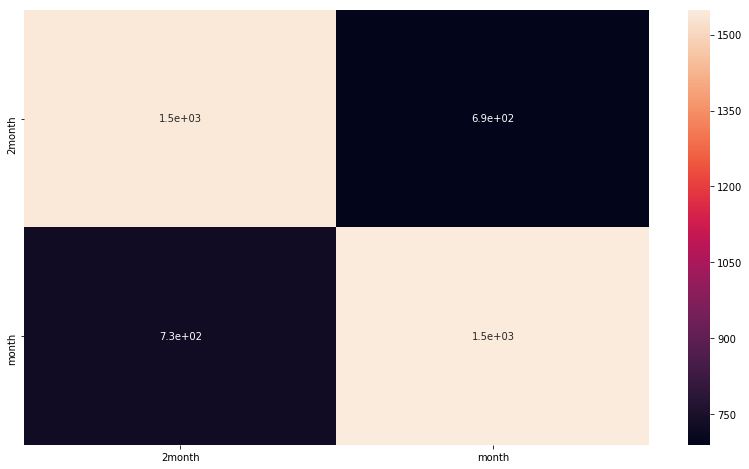

In [141]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, forest2.predict(x_test_layer2[temp])), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

In [142]:
print(classification_report(리얼값, 예측값))

             precision    recall  f1-score   support

     2month       0.68      0.69      0.68      2228
      month       0.69      0.68      0.69      2276

avg / total       0.69      0.69      0.69      4504



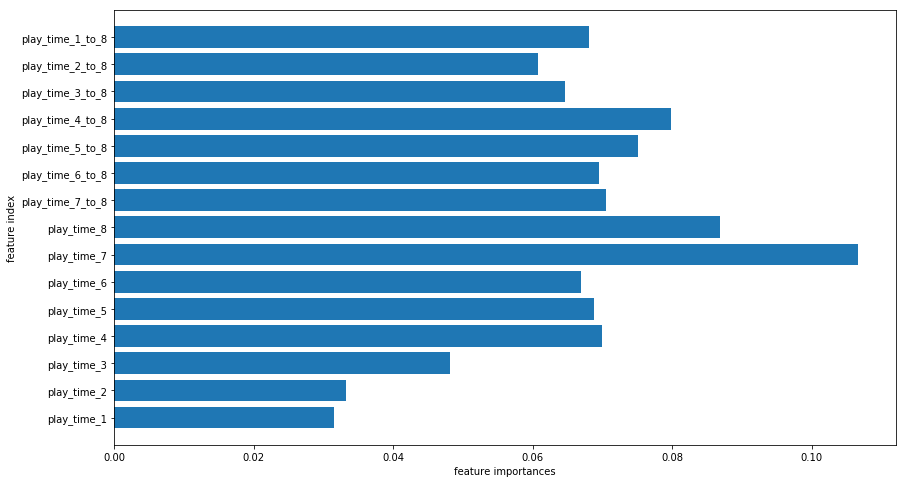

In [143]:
plot_feature_importances(forest2, x_test_layer2[temp].columns)

## Our Test
---

In [ ]:
a
result = forest1.predict(x_test.drop(column_filter, axis=1))

In [ ]:
result[np.where(result == 'MON')[0]] = forest2.predict(x_test.iloc[np.where(result == 'MON')[0]][temp])

In [ ]:
print(classification_report(y_test, result))


# Real Test
---

In [ ]:
# 테스트 데이터 로드
x_test_temp = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_activity_week.csv').sort_values(by='acc_id', ascending=True)

In [ ]:
x_test_temp

In [ ]:
x_test = x_test_temp.drop(['Unnamed: 0','acc_id'], axis=1)

In [ ]:
x_test.shape

In [ ]:
result = forest1.predict(x_test.drop(['party_cnt'], axis=1))

In [ ]:
result[np.where(result == 'MON')[0]] = forest2.predict(x_test.iloc[np.where(result == 'MON')[0]][temp])

In [ ]:
result

In [ ]:
acc_id = x_test_temp.groupby(by='acc_id').mean().index

In [ ]:
data = {'acc_id':acc_id, 'label':result}

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\10_result.csv')